<a href="https://colab.research.google.com/github/zizanayub/Machine-Leaning-Data-Scientist-with-Python/blob/main/01_01_Supervised_Learning_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 01. Using Scikit-Learn to fit a classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier  ##Q1
X = churn_df[["total_day_charge","total_eve_charge"]].values #Q3
y = churn_df['churn'].values ##Q4
print(X.shape,y.shape)

(3333, 2) (3333,)


In [4]:
knn = KNeighborsClassifier(n_neighbors = 6)   ##Q2
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
X_new = np.array([[78,87.2],[21.2,67],[78.1,99]])
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 0 1]


##02. Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 21,test_size = 0.3,stratify = y)  #Q1. Explain all of the parameters.
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))        #Q2. `knn.score(X_test,y_test)`, WHAT and HOW?

0.872


##03. Model Complexity and over/underfitting

In [7]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train,y_train)
  train_accuracies[neighbor] = knn.score(X_train,y_train)
  test_accuracies[neighbor] = knn.score(X_test,y_test)


print(train_accuracies)
print(test_accuracies)

{1: 1.0, 2: 0.9061294470638662, 3: 0.9048435490784398, 4: 0.8911273039005573, 5: 0.8906986712387484, 6: 0.8851264466352337, 7: 0.8829832833261895, 8: 0.8825546506643807, 9: 0.8834119159879983, 10: 0.8825546506643807, 11: 0.8812687526789541, 12: 0.8804114873553365, 13: 0.8816973853407629, 14: 0.8799828546935277, 15: 0.8834119159879983, 16: 0.8812687526789541, 17: 0.8808401200171453, 18: 0.8795542220317188, 19: 0.8786969567081011, 20: 0.8808401200171453, 21: 0.8808401200171453, 22: 0.8782683240462923, 23: 0.8821260180025718, 24: 0.8774110587226747, 25: 0.8812687526789541}
{1: 0.807, 2: 0.871, 3: 0.855, 4: 0.873, 5: 0.867, 6: 0.872, 7: 0.875, 8: 0.876, 9: 0.88, 10: 0.878, 11: 0.878, 12: 0.877, 13: 0.878, 14: 0.877, 15: 0.879, 16: 0.881, 17: 0.879, 18: 0.876, 19: 0.878, 20: 0.877, 21: 0.876, 22: 0.877, 23: 0.881, 24: 0.879, 25: 0.88}


##04. Plotting Training and Test Accuracies

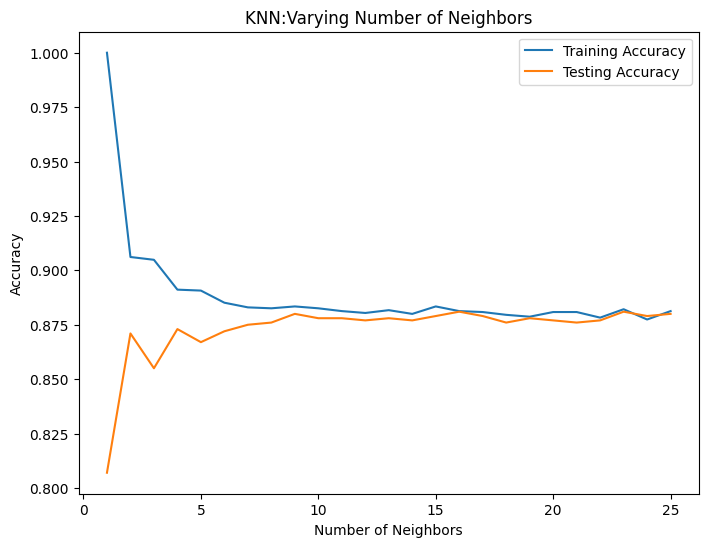

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("KNN:Varying Number of Neighbors")
plt.plot(neighbors,train_accuracies.values(),label = "Training Accuracy")
plt.plot(neighbors,test_accuracies.values(),label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

##05. Predicting Blood Glucose Level

In [9]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##06. Creating features and target arrays

In [10]:
X = diabetes_df.drop('glucose',axis = 1).values
y = diabetes_df['glucose'].values
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


##07. Making prediction from a single feature

In [11]:
X_bmi = X[:,4]
print(X_bmi.shape,y.shape)

(768,) (768,)


##08. Reshaping `X_bmi`

In [12]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


##09. Plotting Glucose vs. BMI

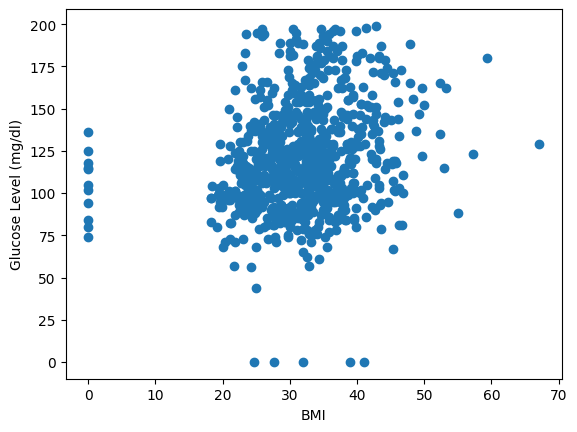

In [13]:
plt.scatter(X_bmi,y)
plt.xlabel("BMI")
plt.ylabel("Glucose Level (mg/dl)")
plt.show()

##10. Fitting a regression model

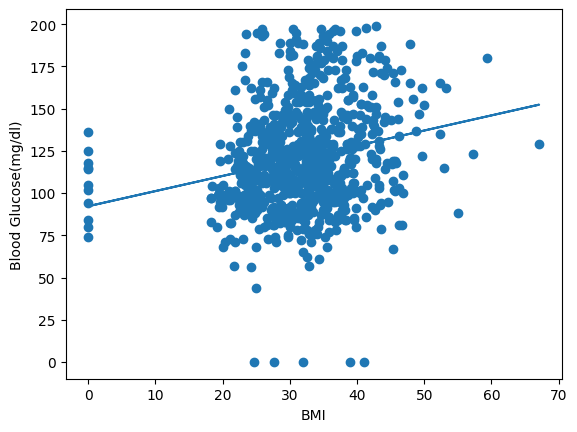

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi,y)
predictions = reg.predict(X_bmi)


plt.scatter(X_bmi,y)
plt.plot(X_bmi,predictions)
plt.ylabel("Blood Glucose(mg/dl)")
plt.xlabel("BMI")
plt.show()

##11. Linear Regression in Higher Dimensions

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 21,test_size = 0.3)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

In [16]:
reg_all.score(X_test,y_test)

0.28701582460171715

##12. Finding Mean Squared Error

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred,squared = True)
rmse = mean_squared_error(y_test,y_pred,squared = False)
print(mse, rmse)

636.8297799182924 25.235486520340604


##13. Cross-Validation in Scikit-Learn

In [18]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv = kf)
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


##14. Evaluating Cross-Validation Performance


In [19]:
print(np.mean(cv_results),np.std(cv_results))

0.31909697867344794 0.070153206101142


In [20]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.24088592 0.41580685]


##15. Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train,y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test,y_test))

print(scores)

[0.2871821081288142, 0.28864884538557534, 0.30075083865691354, 0.3266444676302306, 0.290386181740535]


##16. Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.1,1.0,10.0,20.0,50.0]:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train,y_train)
  y_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test,y_test))

print(scores)

[0.2929135689092045, 0.3298222738388288, 0.2621354084106098, 0.2437901341500236, 0.19875769891921435]


##17. Lasso for feature selection in scikit-learn

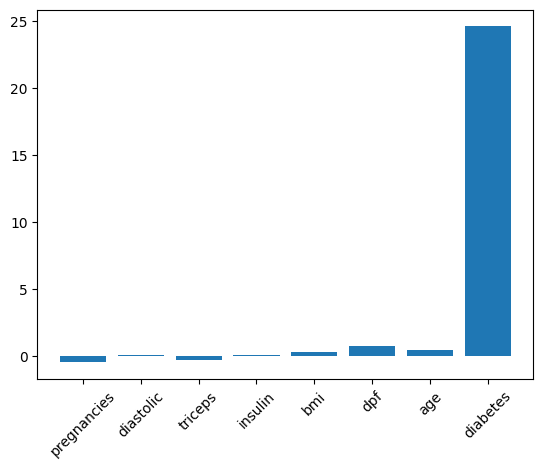

In [32]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose",axis = 1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose",axis = 1).columns

lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_

plt.bar(names,lasso_coef)
plt.xticks(rotation = 45)
plt.show()


###Exercise (Ridge Regression)


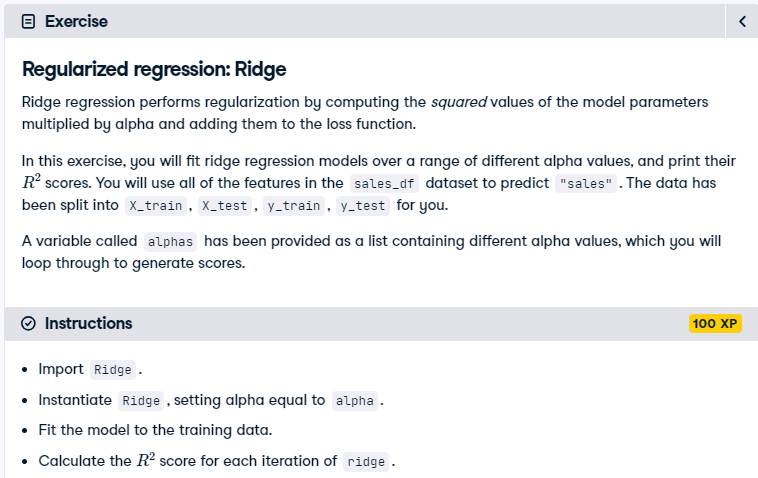

In [33]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)

  # Fit the data
  ridge.fit(X_train,y_train)

  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)


[0.2871821081288142, 0.28864884538557534, 0.30075083865691354, 0.3266444676302306, 0.290386181740535, 0.2690692670112643]


###Exercise(Lasso Regression)


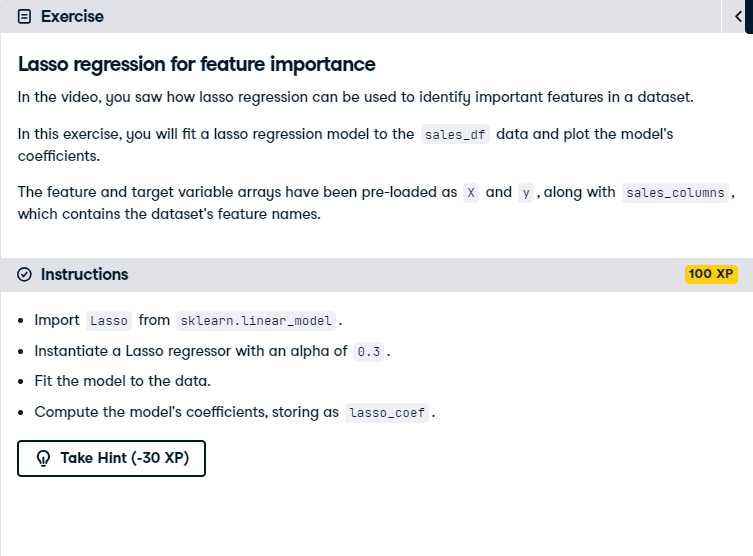

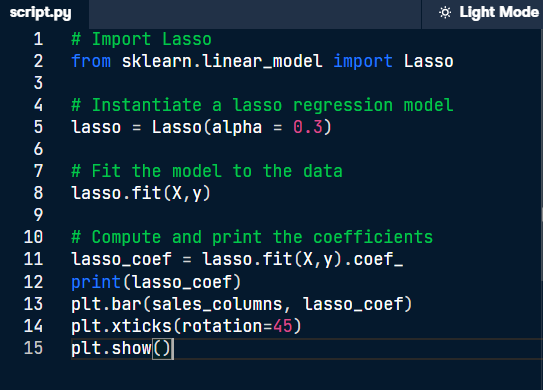